In [ ]:
#Standard libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from pandas import read_csv
import time
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

#sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform


from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.decomposition import PCA






In [ ]:
# Importing the dataset
excel_path = 'S&P 500 Index Dataset.xlsx'
snp500 = pd.read_excel(excel_path, sheet_name=1, header=0, index_col=0, parse_dates=False)
snp500.shape

(9243, 134)

In [ ]:
snp500

,Open,High,Low,Close,Volume,p_sma_5,p_sma_10,p_sma_20,p_sma_50,p_sma_100,...,pvo,pvo_signal,pvo_hist,cmo,cmo_signal,dmi,ko,ko_signal,smi,smi_signal
Date,,,,,,,,,,,,,,,,,,,,,
1985-12-31,210.679993,211.610001,210.679993,211.279999,112700000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-02,211.279999,211.279999,208.929993,209.589996,98960000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-03,209.589996,210.880005,209.509995,210.880005,105000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-06,210.880005,210.979996,209.929993,210.649994,99610000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-07,210.649994,213.800003,210.649994,213.800003,153000000,211.239999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,4153.259766,4200.540039,4147.589844,4199.120117,2976050000,4167.018066,4227.536084,4187.390552,3990.834619,4078.576113,...,-4.181667,-2.820624,-1.361044,11.290710,7.188892,57.057106,1.352025e+10,2.180170e+10,-33.739030,-17.749266
2022-08-26,4198.740234,4203.040039,4057.659912,4057.659912,3175260000,4132.854053,4205.287085,4183.759045,3996.188018,4073.326311,...,-4.062228,-3.068944,-0.993284,-13.420630,-3.115869,42.844444,8.563717e+09,1.991056e+10,-51.071411,-34.410339
2022-08-29,4034.580078,4062.989990,4017.419922,4030.610107,2963020000,4111.378027,4178.634082,4179.358057,4003.464819,4068.381211,...,-4.448877,-3.344931,-1.103946,-14.734367,-8.925118,36.222988,8.615072e+08,1.718926e+10,-63.918175,-49.164257


In [ ]:
snp500['Direction'] = (snp500['Close'].shift(-5)>snp500['Close']).astype(int)
snp500 = snp500.dropna()
snp500.head(50)

,Open,High,Low,Close,Volume,p_sma_5,p_sma_10,p_sma_20,p_sma_50,p_sma_100,...,pvo_signal,pvo_hist,cmo,cmo_signal,dmi,ko,ko_signal,smi,smi_signal,Direction
Date,,,,,,,,,,,,,,,,,,,,,
1986-12-26,246.750000,247.089996,246.729996,246.919998,48860000,247.697998,247.842999,249.416500,245.331000,242.958000,...,0.102228,-5.425167,-21.197020,-23.760447,48.009243,-5.195933e+08,-5.207434e+08,-49.868806,-43.480796,1
1986-12-29,246.899994,246.919998,244.309998,244.669998,99800000,246.685999,247.574998,249.189000,245.433800,243.036300,...,-1.369826,-5.888214,-29.116229,-26.438338,42.540143,-6.510150e+08,-5.393537e+08,-60.984404,-52.232600,1
1986-12-30,244.660004,244.669998,243.039993,243.369995,126200000,245.609998,247.090997,248.905000,245.524400,243.099600,...,-2.534283,-4.657828,-27.222506,-26.830422,38.542213,-8.775885e+08,-5.876729e+08,-69.608947,-60.920773,1
1986-12-31,243.369995,244.029999,241.279999,242.169998,139200000,244.775998,246.303998,248.313499,245.648400,243.152500,...,-3.285501,-3.004875,-41.403752,-34.117087,30.814516,-1.109652e+09,-6.622413e+08,-72.407873,-66.664323,1
1987-01-02,242.169998,246.449997,242.169998,246.449997,91880000,244.715997,246.192998,247.943499,245.859800,243.210200,...,-4.302982,-4.069921,-7.570438,-20.843762,49.306419,-9.772393e+08,-7.072410e+08,-52.576828,-59.620575,1
1987-01-05,246.449997,252.570007,246.449997,252.190002,181900000,245.769998,246.733998,247.900999,246.178400,243.298700,...,-4.341065,-0.152334,17.510851,-1.666456,70.356610,-5.079220e+08,-6.787669e+08,-3.983556,-31.802065,1
1987-01-06,252.199997,253.990005,252.139999,252.779999,189300000,247.391998,247.038998,247.981499,246.448400,243.369800,...,-3.694304,2.587042,16.697097,7.515321,71.682549,-6.433275e+07,-5.909906e+08,29.274141,-1.263962,1
1987-01-07,252.779999,255.720001,252.649994,255.330002,190900000,249.784000,247.696999,248.189999,246.789800,243.460600,...,-2.650317,4.175948,18.832358,13.173839,77.014860,3.425313e+08,-4.576303e+08,53.035395,25.885716,1
1987-01-08,255.360001,257.279999,254.970001,257.279999,194500000,252.806000,248.790999,248.589999,247.160000,243.561900,...,-1.388046,5.049086,35.268513,24.221176,73.159198,7.194606e+08,-2.894745e+08,69.278263,47.581990,1


In [ ]:
# Show rows and columns #list out some of the observations
print("Rows, Columns:");print(snp500.shape);print("\n")

# Describe DataFrame columns
print("Columns:");print(snp500.columns);print("\n")

# Show info on DataFrame
print("Info:");print(snp500.info(max_cols=1000)); print("\n")

# Count Non-NA values
print("Non-NA:");print(snp500.count()); print("\n")

# Show head
print("Head");print(snp500.head()); print("\n")

# Show tail
print("Tail");print(snp500.tail());print("\n")

# Show summary statistics
print("Summary statistics:");print(snp500.describe());print("\n")

Rows, Columns:
(8993, 135)


Columns:
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'p_sma_5', 'p_sma_10',
       'p_sma_20', 'p_sma_50', 'p_sma_100',
       ...
       'pvo_signal', 'pvo_hist', 'cmo', 'cmo_signal', 'dmi', 'ko', 'ko_signal',
       'smi', 'smi_signal', 'Direction'],
      dtype='object', length=135)


Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8993 entries, 1986-12-26 to 2022-08-31
Data columns (total 135 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    Open             8993 non-null   float64
 1    High             8993 non-null   float64
 2    Low              8993 non-null   float64
 3    Close            8993 non-null   float64
 4    Volume           8993 non-null   int64  
 5    p_sma_5          8993 non-null   float64
 6    p_sma_10         8993 non-null   float64
 7    p_sma_20         8993 non-null   float64
 8    p_sma_50         8993 non-null   float64
 9    p_sma_100        8993 

In [ ]:
y = snp500['Direction']

In [ ]:
X = snp500.drop(columns=['Direction']) #X represents all features
X

,Open,High,Low,Close,Volume,p_sma_5,p_sma_10,p_sma_20,p_sma_50,p_sma_100,...,pvo,pvo_signal,pvo_hist,cmo,cmo_signal,dmi,ko,ko_signal,smi,smi_signal
Date,,,,,,,,,,,,,,,,,,,,,
1986-12-26,246.750000,247.089996,246.729996,246.919998,48860000,247.697998,247.842999,249.416500,245.331000,242.958000,...,-5.322939,0.102228,-5.425167,-21.197020,-23.760447,48.009243,-5.195933e+08,-5.207434e+08,-49.868806,-43.480796
1986-12-29,246.899994,246.919998,244.309998,244.669998,99800000,246.685999,247.574998,249.189000,245.433800,243.036300,...,-7.258040,-1.369826,-5.888214,-29.116229,-26.438338,42.540143,-6.510150e+08,-5.393537e+08,-60.984404,-52.232600
1986-12-30,244.660004,244.669998,243.039993,243.369995,126200000,245.609998,247.090997,248.905000,245.524400,243.099600,...,-7.192111,-2.534283,-4.657828,-27.222506,-26.830422,38.542213,-8.775885e+08,-5.876729e+08,-69.608947,-60.920773
1986-12-31,243.369995,244.029999,241.279999,242.169998,139200000,244.775998,246.303998,248.313499,245.648400,243.152500,...,-6.290376,-3.285501,-3.004875,-41.403752,-34.117087,30.814516,-1.109652e+09,-6.622413e+08,-72.407873,-66.664323
1987-01-02,242.169998,246.449997,242.169998,246.449997,91880000,244.715997,246.192998,247.943499,245.859800,243.210200,...,-8.372903,-4.302982,-4.069921,-7.570438,-20.843762,49.306419,-9.772393e+08,-7.072410e+08,-52.576828,-59.620575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,4153.259766,4200.540039,4147.589844,4199.120117,2976050000,4167.018066,4227.536084,4187.390552,3990.834619,4078.576113,...,-4.181667,-2.820624,-1.361044,11.290710,7.188892,57.057106,1.352025e+10,2.180170e+10,-33.739030,-17.749266
2022-08-26,4198.740234,4203.040039,4057.659912,4057.659912,3175260000,4132.854053,4205.287085,4183.759045,3996.188018,4073.326311,...,-4.062228,-3.068944,-0.993284,-13.420630,-3.115869,42.844444,8.563717e+09,1.991056e+10,-51.071411,-34.410339
2022-08-29,4034.580078,4062.989990,4017.419922,4030.610107,2963020000,4111.378027,4178.634082,4179.358057,4003.464819,4068.381211,...,-4.448877,-3.344931,-1.103946,-14.734367,-8.925118,36.222988,8.615072e+08,1.718926e+10,-63.918175,-49.164257


In [ ]:
#Define Data for Machine Learning

X_start = 0
X_lag = 0





In [ ]:
X

,Open,High,Low,Close,Volume,p_sma_5,p_sma_10,p_sma_20,p_sma_50,p_sma_100,...,pvo,pvo_signal,pvo_hist,cmo,cmo_signal,dmi,ko,ko_signal,smi,smi_signal
Date,,,,,,,,,,,,,,,,,,,,,
1986-12-26,246.750000,247.089996,246.729996,246.919998,48860000,247.697998,247.842999,249.416500,245.331000,242.958000,...,-5.322939,0.102228,-5.425167,-21.197020,-23.760447,48.009243,-5.195933e+08,-5.207434e+08,-49.868806,-43.480796
1986-12-29,246.899994,246.919998,244.309998,244.669998,99800000,246.685999,247.574998,249.189000,245.433800,243.036300,...,-7.258040,-1.369826,-5.888214,-29.116229,-26.438338,42.540143,-6.510150e+08,-5.393537e+08,-60.984404,-52.232600
1986-12-30,244.660004,244.669998,243.039993,243.369995,126200000,245.609998,247.090997,248.905000,245.524400,243.099600,...,-7.192111,-2.534283,-4.657828,-27.222506,-26.830422,38.542213,-8.775885e+08,-5.876729e+08,-69.608947,-60.920773
1986-12-31,243.369995,244.029999,241.279999,242.169998,139200000,244.775998,246.303998,248.313499,245.648400,243.152500,...,-6.290376,-3.285501,-3.004875,-41.403752,-34.117087,30.814516,-1.109652e+09,-6.622413e+08,-72.407873,-66.664323
1987-01-02,242.169998,246.449997,242.169998,246.449997,91880000,244.715997,246.192998,247.943499,245.859800,243.210200,...,-8.372903,-4.302982,-4.069921,-7.570438,-20.843762,49.306419,-9.772393e+08,-7.072410e+08,-52.576828,-59.620575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,4153.259766,4200.540039,4147.589844,4199.120117,2976050000,4167.018066,4227.536084,4187.390552,3990.834619,4078.576113,...,-4.181667,-2.820624,-1.361044,11.290710,7.188892,57.057106,1.352025e+10,2.180170e+10,-33.739030,-17.749266
2022-08-26,4198.740234,4203.040039,4057.659912,4057.659912,3175260000,4132.854053,4205.287085,4183.759045,3996.188018,4073.326311,...,-4.062228,-3.068944,-0.993284,-13.420630,-3.115869,42.844444,8.563717e+09,1.991056e+10,-51.071411,-34.410339
2022-08-29,4034.580078,4062.989990,4017.419922,4030.610107,2963020000,4111.378027,4178.634082,4179.358057,4003.464819,4068.381211,...,-4.448877,-3.344931,-1.103946,-14.734367,-8.925118,36.222988,8.615072e+08,1.718926e+10,-63.918175,-49.164257


In [ ]:
y

Date
1986-12-26    1
1986-12-29    1
1986-12-30    1
1986-12-31    1
1987-01-02    1
             ..
2022-08-25    0
2022-08-26    0
2022-08-29    0
2022-08-30    0
2022-08-31    0
Name: Direction, Length: 8993, dtype: int64

In [ ]:
steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
           ('pca', PCA(n_components = 1, random_state=1))]

pl_pca_X = Pipeline(steps_X)

X_pca_model = pl_pca_X.fit(X)

print('n_components:', 1, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())

X_pca = X_pca_model.transform(X)

n_components: 1    variance explained: 0.431


In [ ]:
for n_comp in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,134]:

    steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = n_comp, random_state=1))]

    pl_pca_X = Pipeline(steps_X)
    X_pca_model = pl_pca_X.fit(X)

    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())


n_components: 1    variance explained: 0.431
n_components: 2    variance explained: 0.659
n_components: 3    variance explained: 0.740
n_components: 4    variance explained: 0.776
n_components: 5    variance explained: 0.807
n_components: 6    variance explained: 0.835
n_components: 7    variance explained: 0.854
n_components: 8    variance explained: 0.868
n_components: 9    variance explained: 0.879
n_components: 10    variance explained: 0.891
n_components: 11    variance explained: 0.901
n_components: 12    variance explained: 0.909
n_components: 13    variance explained: 0.917
n_components: 14    variance explained: 0.924
n_components: 15    variance explained: 0.930
n_components: 16    variance explained: 0.936
n_components: 17    variance explained: 0.941
n_components: 18    variance explained: 0.946
n_components: 19    variance explained: 0.950
n_components: 20    variance explained: 0.954
n_components: 30    variance explained: 0.981
n_components: 50    variance explained: 0.9

In [ ]:
n_train = 75
n_records = len(X)
n_forecast = n_records-n_train

j = 0
for i in range(n_train, n_records):
    #train, test = X[0:i], X[i:i+1]   #expanding window
    train, test = X[j:i], X[i:i+1]   #rolling window
#    print('train=%d, test=%d' % (len(train), len(test)))
    j += 1

In [ ]:
# pipeline
def pipeline(config):

    # unpack config
    n_trees, n_comps, learn_rate, reg_alp, reg_lamb = config #regularization alpha and lambda

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components=n_comps, random_state=1)),
             ('xgboost', XGBClassifier(objective='binary:logistic', n_estimators=n_trees, learning_rate=learn_rate, reg_alpha=reg_alp, reg_lambda=reg_lamb, eval_metric='logloss', use_label_encoder=False, random_state=1))
            ] #extreme gradient boost classifier  #search optimum values

    pipeline = Pipeline(steps)

    return pipeline

In [ ]:
def walk_forward_validation(cfg):

    n_train = 75

    n_records = len(X)

    y_test_list = []

    y_pred_list = []

    y_prob_list = []

    j = 0

    for i in range(n_train, n_records):

        X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]

        model = pipeline(cfg).fit(X_train, y_train)

        y_pred = model.predict(X_test)

        y_prob = model.predict_proba(X_test)[:, 1]

        y_pred_list.extend(y_pred)

        y_prob_list.extend(y_prob)

        y_test_list.extend(y_test)

        j += 1

    score_acc = metrics.accuracy_score(y_test_list, y_pred_list)

    print(' > %.3f' % score_acc)

    return score_acc

In [ ]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [ ]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_acc, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

In [ ]:
# create a list of configs to try
def model_configs():
    # define scope of configs

    n_trees = [75]

    n_comps = [1, 5, 10, 20, 30, 50] #search principal components

    learn_rate = [0.3]  # could try 0.1, 0.2 or 0.3

    reg_alp = [0.5]

    reg_lamb = [0]

    # create configs
    configs = list()
    for i in n_trees:
        for j in n_comps:
            for k in learn_rate:
                for l in reg_alp:
                    for m in reg_lamb:
                        cfg = [i, j, k, l, m]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

In [ ]:
# model configs
cfg_list = model_configs()

Total configs: 6


In [ ]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 6
 > 0.605
> Model[[75, 1, 0.3, 0.5, 0]] 0.605
 > 0.719
> Model[[75, 5, 0.3, 0.5, 0]] 0.719
 > 0.731
> Model[[75, 10, 0.3, 0.5, 0]] 0.731
 > 0.735
> Model[[75, 20, 0.3, 0.5, 0]] 0.735
 > 0.738
> Model[[75, 30, 0.3, 0.5, 0]] 0.738
 > 0.730
> Model[[75, 50, 0.3, 0.5, 0]] 0.730
done


In [ ]:
scores

[('[75, 1, 0.3, 0.5, 0]', 0.6049562682215743),
 ('[75, 5, 0.3, 0.5, 0]', 0.7194438214846378),
 ('[75, 50, 0.3, 0.5, 0]', 0.7302085669432609),
 ('[75, 10, 0.3, 0.5, 0]', 0.7311056290648127),
 ('[75, 20, 0.3, 0.5, 0]', 0.7350302758466024),
 ('[75, 30, 0.3, 0.5, 0]', 0.7376093294460642)]

In [ ]:
# Pipeline

# Steps

steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components=30, random_state=1)),
               ('xgboost', XGBClassifier(objective='binary:logistic', n_estimators=75, learning_rate=0.3, reg_alpha=0.5, reg_lambda=0, eval_metric='logloss', use_label_encoder=False, random_state=1))
              ]

pipeline_final = Pipeline(steps_final)

In [ ]:
start=time.time()

n_train = 75

n_records = len(X)

y_test_list = []

y_pred_list = []

y_prob_list = []

j = 0

for i in range(n_train, n_records):

    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]

    model = pipeline_final.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_prob = model.predict_proba(X_test)[:, 1]

    y_pred_list.extend(y_pred)

    y_prob_list.extend(y_prob)

    y_test_list.extend(y_test)

    j += 1

end=time.time()

print("Running Time:", end - start)

Running Time: 1053.8563485145569


Overall Accuracy: 73.761
0: Precision:    69.917
0: Recall:       66.808
0: F1 score:     68.327
1: Precision:  76.375
1: Recall:     78.872
1: F1 score:   77.603
ROC_AUC:          0.782


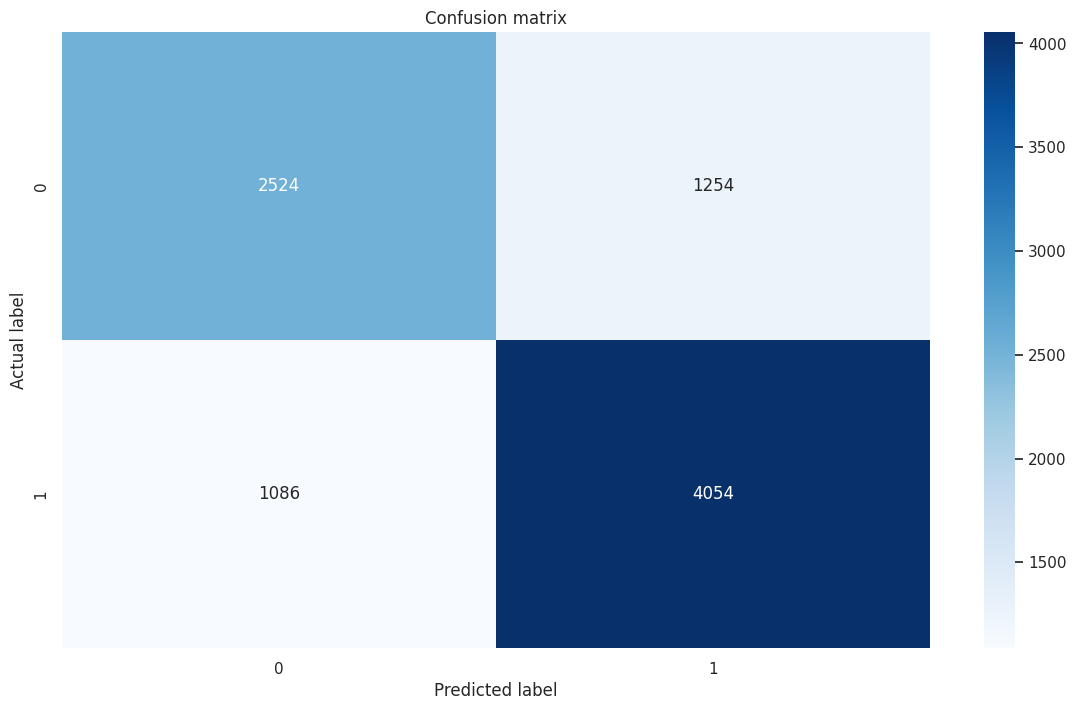

In [ ]:
# create confustion matrix

CM = metrics.confusion_matrix(y_test_list, y_pred_list)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_list, y_pred_list)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

Accuracy = metrics.accuracy_score(y_test_list, y_pred_list)*100
One_Precision = metrics.precision_score(y_test_list, y_pred_list)*100
One_Recall = metrics.recall_score(y_test_list, y_pred_list)*100
One_F1 = metrics.f1_score(y_test_list, y_pred_list)*100
Zero_Precision = TN/(TN+FN)*100
Zero_Recall = TN/(TN+FP)*100
Zero_F1 = 2*(TN/(TN+FN))*(TN/(TN+FP))/((TN/(TN+FN)) +(TN/(TN+FP)))*100
ROC_AUC =  metrics.roc_auc_score(y_test_list, y_prob_list)

print("Overall Accuracy:", '%.3f' %Accuracy)
print("0: Precision:   ", '%.3f' % Zero_Precision)
print("0: Recall:      ", '%.3f' % Zero_Recall)
print("0: F1 score:    ", '%.3f' % Zero_F1)
print("1: Precision: ", '%.3f' % One_Precision)
print("1: Recall:    ", '%.3f' % One_Recall)
print("1: F1 score:  ", '%.3f' % One_F1)
print("ROC_AUC:         ", '%.3f' % ROC_AUC)

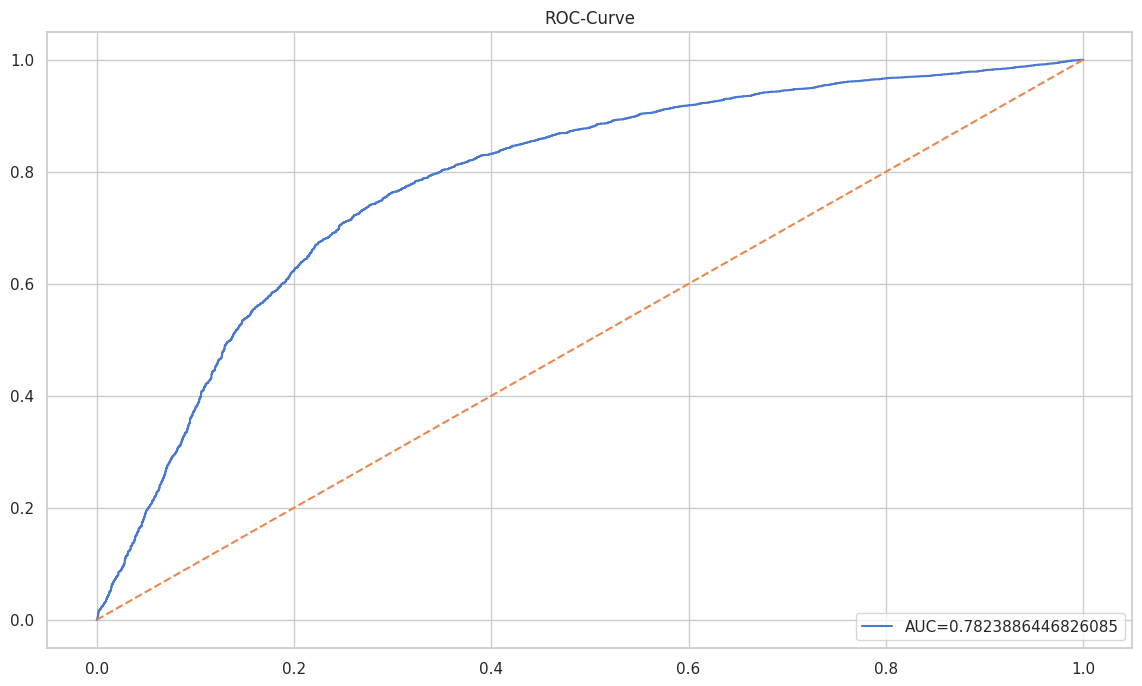

In [ ]:
fpr, tpr, _=metrics.roc_curve(y_test_list, y_prob_list)
auc=metrics.roc_auc_score(y_test_list, y_prob_list)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') # plot no skill
plt.title('ROC-Curve')
plt.show()

In [ ]:
result = pd.DataFrame({'Trend_Actual': y[-n_forecast:], 'Trend_Predicted': y_pred_list, 'Trend_Probability': y_prob_list}, columns=['Trend_Actual', 'Trend_Predicted', 'Trend_Probability'])
#result.to_csv('Trend_result_rfc.csv')
pd.options.display.max_rows=300
result

,Trend_Actual,Trend_Predicted,Trend_Probability
Date,,,
1987-04-14,1,1,0.815072
1987-04-15,1,1,0.954444
1987-04-16,0,1,0.593175
1987-04-20,0,0,0.163059
1987-04-21,0,0,0.105420
...,...,...,...
2022-08-25,0,0,0.012268
2022-08-26,0,0,0.470002
2022-08-29,0,0,0.033215


In [ ]:
import json
with open('XGboost_y_test_list.json', 'w') as f:
    json.dump(y_test_list, f)

arr = np.array(y_pred_list)
list_to_save = arr.tolist()

with open('XGboost_y_pred_list.json', 'w') as f:
    json.dump(list_to_save, f)

SyntaxError: ignored